In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
from google.colab import files
uploaded = files.upload()

Saving train-data.csv to train-data (2).csv


In [68]:
df=pd.read_csv("train-data (2).csv")
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [69]:
df.shape


(6019, 13)

In [72]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [73]:
df['Seats'].mode()

0    5.0
dtype: float64

In [74]:
df['Seats'].fillna(value=5.0, inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [76]:
#removing kmpl and km/kg from mileage column
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
df['Mileage'] = df['Mileage'].apply(lambda x:str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))
#removing CC from engine column
df['Engine'] = df['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))
#removing bhp from power column
df['Power'] = df['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))

In [77]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [78]:
df['Engine'].mode()
# df['Seats'].fillna(value=5.0, inplace=True)

0    1197.0
dtype: float64

In [79]:
df['Mileage'].mode()

0    17.0
dtype: float64

In [57]:
df['Power'].mode()

0    74.0
dtype: float64

In [80]:
df['Engine'].fillna(value=1197.0, inplace=True)

In [81]:
df['Power'].fillna(value=74.0, inplace=True)

In [82]:
df['Mileage'].fillna(value=17.0, inplace=True)

In [83]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [84]:
df['Name'].nunique()
df['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [85]:
Brand_Name = df['Name'].str.split(' ').str[0]
# print(Brand_Name)
df.insert(1, "Brand_Name", Brand_Name, True)
df

,Name,Brand_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


In [86]:
df['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [87]:
df.head(5)

,Name,Brand_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [88]:
#merging Isuzu and ISUZU
df.Brand_Name[df.Brand_Name=='Isuzu']='ISUZU'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
#dropping the Name ,Location and new_price column
df1_map=df.drop(['Name','Location','New_Price'],axis=1)

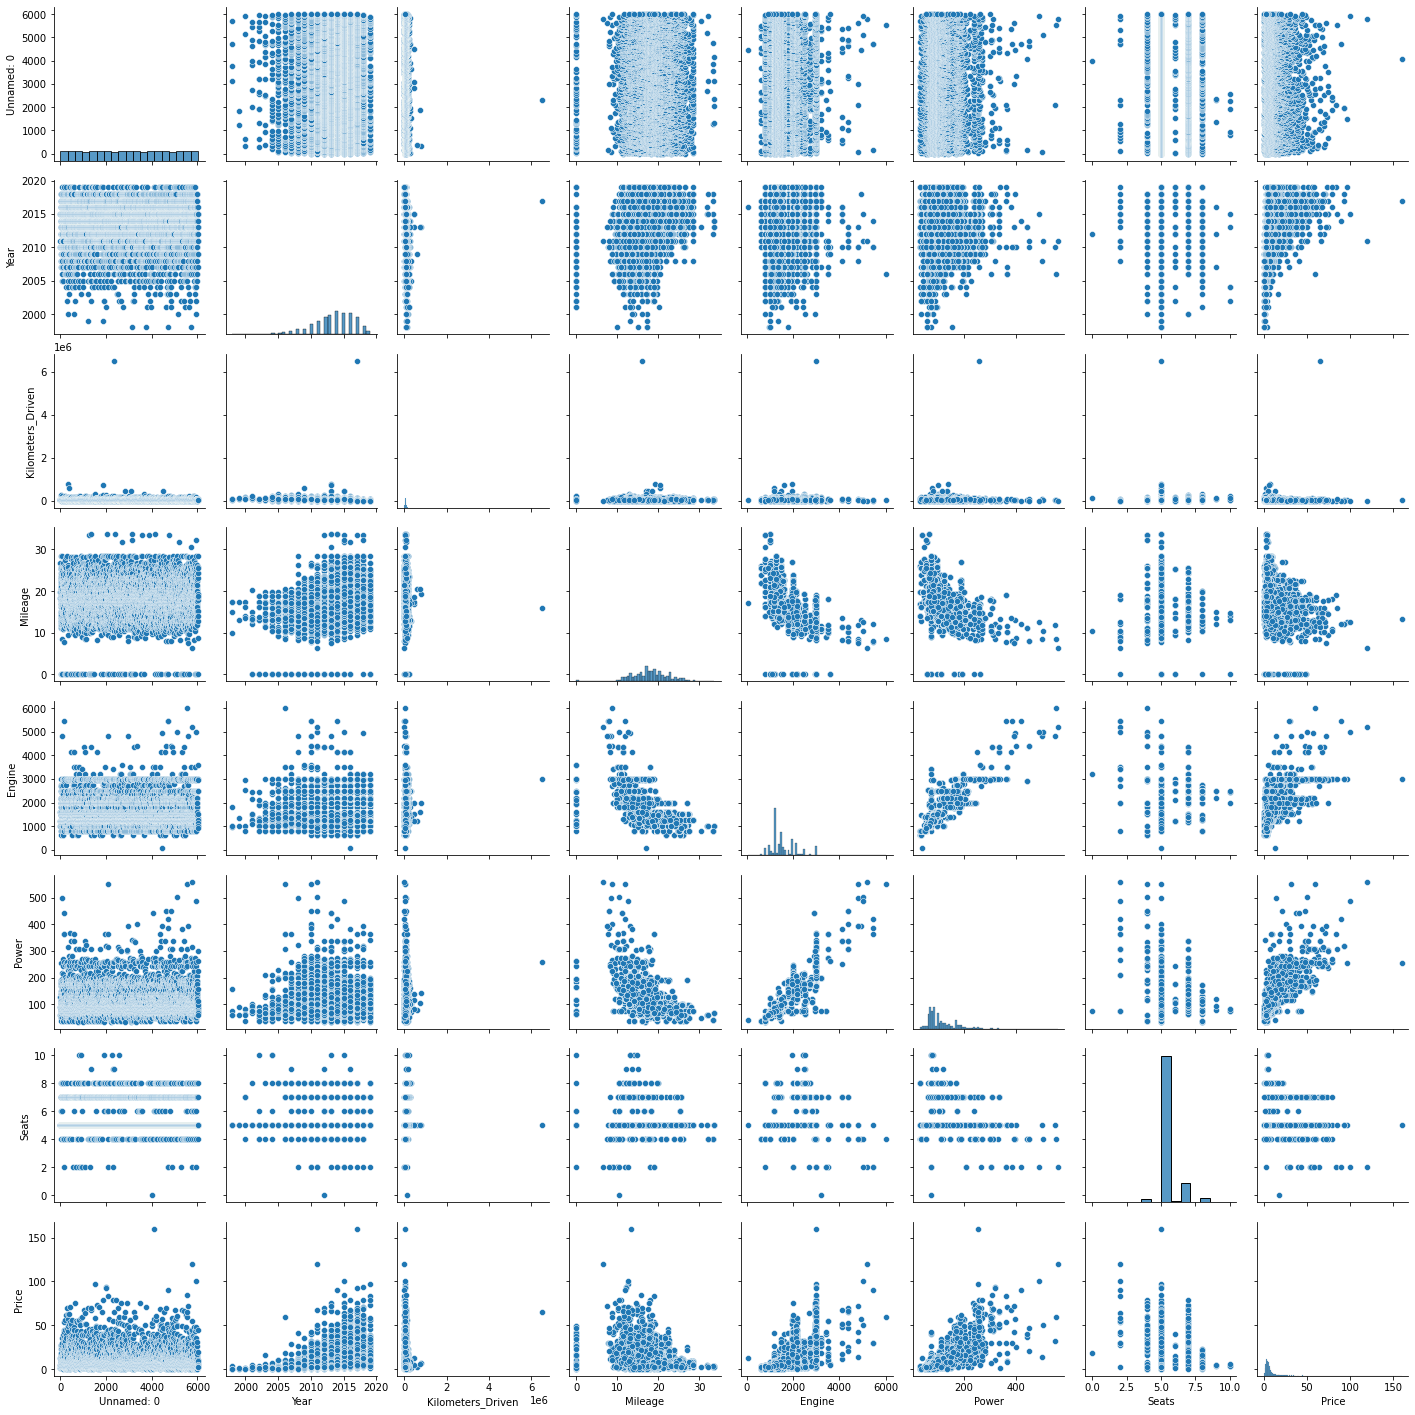

In [27]:
import seaborn as sns
sns.pairplot(df1_map)

In [90]:
df1_map.head(5)

,Brand_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


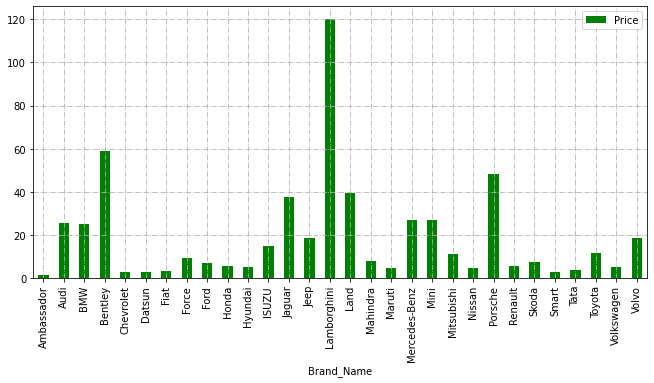

In [ ]:
BrandVsPrice= pd.DataFrame (df1_map.groupby('Brand_Name')['Price'].mean()) 
BrandVsPrice.plot.bar(color='green', figsize=(11,5)) 
plt.grid(linestyle='-.') 
plt.show()

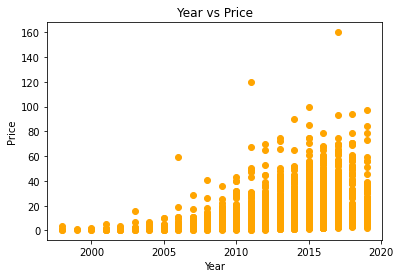

In [ ]:
#year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(df1_map.Year,df1_map.Price, color="orange")


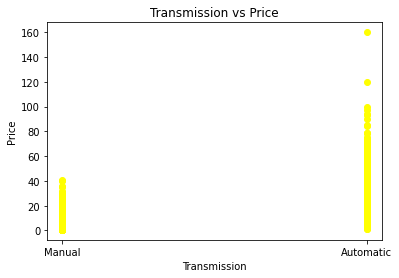

In [ ]:
#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(df1_map.Transmission,df1_map.Price,color="yellow")

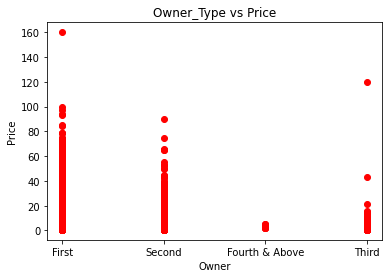

In [ ]:
#owner type vs price
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(df1_map.Owner_Type,df1_map.Price,color="red")

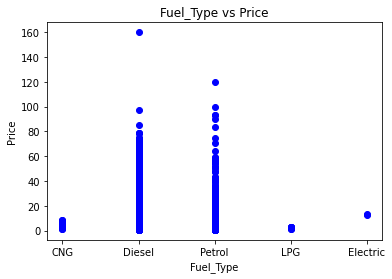

In [ ]:
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(df1_map.Fuel_Type,df1_map.Price,color="blue")

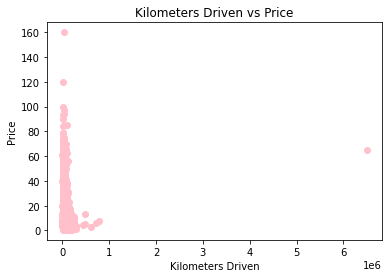

In [ ]:
plt.title("Kilometers Driven vs Price")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.scatter (df1_map.Kilometers_Driven, df1_map.Price, color="pink")

In [ ]:
df1_map.isin([0]).sum()

Brand_Name            0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              68
Engine                0
Power                 0
Seats                 1
Price                 0
dtype: int64

In [91]:
df1_map.drop(df1_map[df1_map['Seats']==0].index,axis=0,inplace=True)
#we have already calculated the mode of milage column for filling #null values which is 17.0, so we will 0 with the same
df1_map["Mileage"].replace({0.0:17.0 },inplace=True)

In [92]:
#creating a new dataframe 
#Handling categorical Columns
#Fuel_Type ,Transmission,Owner_type,and Brand_Name are categorical columns:
df2_n = df1_map.copy()

In [93]:
from sklearn.preprocessing import LabelEncoder
le_Fuel_Type=LabelEncoder()
le_Transmission=LabelEncoder()
le_Owner_Type=LabelEncoder()
le_Brand_Name=LabelEncoder()
df2_n['Fuel_Type_n']= le_Fuel_Type.fit_transform(df2_n['Fuel_Type'])
df2_n['Transmission_n']=le_Transmission.fit_transform(df2_n['Transmission'])
df2_n['Owner_Type_n']=le_Owner_Type.fit_transform(df2_n['Owner_Type'])
df2_n['Brand_Name_n']=le_Brand_Name.fit_transform(df2_n['Brand_Name'])

In [94]:
df2_n.head(1)

,Brand_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,Maruti,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,0,1,0,17


In [95]:
# Dropping columns with data type object
df2_n=df2_n.drop(["Fuel_Type","Transmission","Owner_Type","Brand_Name"],axis='columns')

In [96]:
df2_n=df2_n[['Brand_Name_n','Year','Kilometers_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Mileage','Engine','Power','Seats','Price']]

In [97]:
df3_inputs=df2_n.drop (["Price"], axis='columns') 
df3_target=df2_n['Price']

In [98]:
df3_inputs.head(3)

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0


In [99]:
df3_target.head(3)

0     1.75
1    12.50
2     4.50
Name: Price, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,Y_train,Y_test=train_test_split (df3_inputs, df3_target, test_size=0.2, random_state=10)

In [101]:
Model_RandomForest = RandomForestRegressor(max_features='sqrt', bootstrap="True")
Model_RandomForest.fit(X_train,Y_train)
RandomForestRegressor(bootstrap='True', ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0, warm_start=False)
Model_RandomForest.score(X_test,Y_test)

0.8793816000279678

0-(Brand_Name)
1-(year)
2-(KM drove)
3-(mileage)
4-(cc)
5-(power)
6-no of seats
7-Petrol
8-Manual
9-first hand